## Thêm các thư viện cần thiết

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from ast import literal_eval
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Load dữ liệu đã qua xử lý vào dataframe

In [2]:
data_path = os.path.join(Path(os.getcwd()).parent, 'data', 'cleaned data', 'top_tracks_by_artist_cleaned.csv')
tracks_df = pd.read_csv(data_path, encoding = 'utf-8')
tracks_df.head(10)

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,0eAWyR4wHynLdc9A0VTVQP,Lửng Lơ - Remix,IOF Viet Nam,100,[],Lửng Lơ (Remix),2022-07-07,1,258,False,25
1,5iN9Ok2bsAE2lCBVEx9L1U,Cheri Cheri Lady - Remix,IOF Viet Nam,100,[],Cheri Cheri Lady (Remix),2022-07-07,1,193,False,24
2,0NIjRHPH7vq56ZaEgfk1DD,Ngày Chưa Giông Bão - Remix,IOF Viet Nam,100,[],Ngày Chưa Giông Bão (Remix),2022-06-29,1,202,False,15
3,5yANdLi61sbT2gBK1jIGVV,Tay Trái Chỉ Trăng - Remix,IOF Viet Nam,100,[],Tay Trái Chỉ Trăng (Remix),2022-06-28,1,243,False,12
4,2OCkw2aRFHZJ3k9zy07g5x,Xa Vắng - Remix,IOF Viet Nam,100,[],Xa Vắng (Remix),2022-07-24,1,142,False,12
5,3SLjbUMFZ3xSuTy4mtIu7L,Mang Tiền Về Cho Vợ,IOF Viet Nam,100,[],Mang Tiền Về Cho Vợ,2022-01-17,1,109,False,5
6,7AlBL7OIR2BbrEjrk2cjyL,Những Lời Dối Gian - Remix,IOF Viet Nam,100,[],Những Lời Dối Gian (Remix),2022-06-28,1,281,False,3
7,7rhxCitKSNsI4f1FB5Iq76,Em Tên Thiên Lý - Võ Tuấn Kiệt Remix,IOF Viet Nam,100,[],Em Tên Thiên Lý (Võ Tuấn Kiệt Remix),2022-04-14,1,121,False,2
8,2TqjLbM2E5I4ce6iWTdXly,Hơn Em Chỗ Nào,Thùy Chi,477414,"['v-pop', 'vietnamese singer-songwriter']",Hơn Em Chỗ Nào,2022-12-05,2,295,False,54
9,69EwGs863aPS8olgCWtZ8J,Phiến Lá Tĩnh Lặng,Thùy Chi,477414,"['v-pop', 'vietnamese singer-songwriter']",Phiến Lá Tĩnh Lặng,2021-04-20,1,307,False,46


## Chuyển đổi kiểu dữ liệu

In [3]:
tracks_df.dtypes

id                    object
name                  object
artist                object
artist_followers       int64
artist_genres         object
album                 object
release_date          object
album_total_tracks     int64
duration               int64
explicit                bool
popularity             int64
dtype: object

In [4]:
datetime_col = pd.to_datetime(tracks_df['release_date'], format='%Y-%m-%d', errors = 'coerce')
datetime_col = datetime_col.fillna(pd.to_datetime(tracks_df['release_date'], format='%Y', errors = 'coerce'))
tracks_df['release_date'] = datetime_col

In [5]:
tracks_df.loc[:, 'artist_genres'] = tracks_df['artist_genres'].apply(literal_eval)

In [6]:
tracks_df.dtypes

id                            object
name                          object
artist                        object
artist_followers               int64
artist_genres                 object
album                         object
release_date          datetime64[ns]
album_total_tracks             int64
duration                       int64
explicit                        bool
popularity                     int64
dtype: object

## Câu hỏi 1: Đâu là những bài hát dù đã ra mắt từ lâu những vẫn được nhiều người nghe ở thời điểm hiện tại ?

**Ý nghĩa của câu hỏi:** Trả lời câu hỏi này có thể giúp ta tìm ra được những bài hát thực sự hay, có giai điệu bắt tai và khiến nhiều người vẫn tiếp tục nghe đi nghe lại cho đến tận bây giờ.

### Các bước thực hiện

Lấy ra các bài hát được phát hành ít nhất từ 2 năm đổ về trước, tức là các bài hát ra mắt trước 2021.

In [7]:
tracks_old_df = tracks_df[tracks_df['release_date'].apply(lambda x : int(x.year) <= 2021)]
tracks_old_df.head(10)

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
9,69EwGs863aPS8olgCWtZ8J,Phiến Lá Tĩnh Lặng,Thùy Chi,477414,"[v-pop, vietnamese singer-songwriter]",Phiến Lá Tĩnh Lặng,2021-04-20,1,307,False,46
10,2iTzIxM3EcXXnWYyqnwbZ6,Xe Đạp,Thùy Chi,477414,"[v-pop, vietnamese singer-songwriter]",Tuổi Hoa Mộng,2017-09-25,12,285,False,43
11,5bV1PnXi6B8kYl1OIUZKlu,"Giữ Em Đi - From ""Mùa Oải Hương Năm Ấy""",Thùy Chi,477414,"[v-pop, vietnamese singer-songwriter]",Mua Oai Huong Nam Ay - Lavender's Love Story (...,2014-01-01,2,284,False,43
12,7iYjIqTrM9fdncKjuDVnOa,Quê Tôi,Thùy Chi,477414,"[v-pop, vietnamese singer-songwriter]",The Best Of Thùy Chi 3,2017-05-31,9,269,False,39
13,1QoEs95UcKglqpcYx6qam1,Con Đường Hạnh Phúc,Thùy Chi,477414,"[v-pop, vietnamese singer-songwriter]",The Best Of Thùy Chi 2,2012-12-15,14,303,False,37
14,7mGnyV8iszJprTTUxD3aua,Giấc Mơ Trưa,Thùy Chi,477414,"[v-pop, vietnamese singer-songwriter]",The Best Of Thùy Chi 1,2012-05-10,15,341,False,37
15,7G53KNMkppNKzbVDA4KhaK,Nói Chia Tay Thật Khó (feat. Trấn Thành),Thùy Chi,477414,"[v-pop, vietnamese singer-songwriter]",Nói Chia Tay Thật Khó,2020-10-20,2,331,False,35
17,0RLK2sJy7YiSymsdQtr6YD,Mong Manh Tình Về,Thùy Chi,477414,"[v-pop, vietnamese singer-songwriter]",The Best Of Thùy Chi 3,2017-05-31,9,307,False,32
20,5Bti0azlFhMattVY76qFr9,Lạ Lùng,Vũ.,1425153,"[indie viet, rock viet, v-pop, vietnamese sing...",Lạ Lùng,2016-12-24,1,261,False,59
24,0B1ZnYwYefkNhZeE8ZQpv5,Đông Kiếm Em,Vũ.,1425153,"[indie viet, rock viet, v-pop, vietnamese sing...",Đông Kiếm Em,2015-03-28,1,246,False,52


Sắp xếp bài hát theo popularity

In [8]:
sorted_df = tracks_old_df.sort_values(by = 'popularity', ascending = False).reset_index(drop = True)
sorted_df = sorted_df[['name', 'artist', 'release_date', 'popularity']].drop_duplicates(subset = ['name', 'release_date']).reset_index(drop = True)
sorted_df.head(20)

,name,artist,release_date,popularity
0,bao tiền một mớ bình yên?,Bon Nghiêm,2020-01-01,65
1,Ánh Sao Và Bầu Trời,T.R.I,2021-09-10,64
2,Chúng Ta Của Hiện Tại,Sơn Tùng M-TP,2020-12-20,63
3,Đi Về Nhà,JustaTee,2020-12-20,63
4,Thích Em Hơi Nhiều,Wren Evans,2021-06-18,63
5,Yêu Một Người Có Lẽ,Lou Hoang,2016-03-07,62
6,Sinh Ra Đã Là Thứ Đối Lập Nhau (feat. Badbies),Da LAB,2020-12-29,62
7,Buồn Thì Cứ Khóc Đi,Lynk Lee,2019-12-13,61
8,Cứ Chill Thôi,Chillies,2020-07-11,61
9,3107 3,W/N,2021-07-31,61


Text(0.5, 1.0, 'Top 20 bài hát cũ được nhiều người nghe nhất ở thời điểm hiện tại')

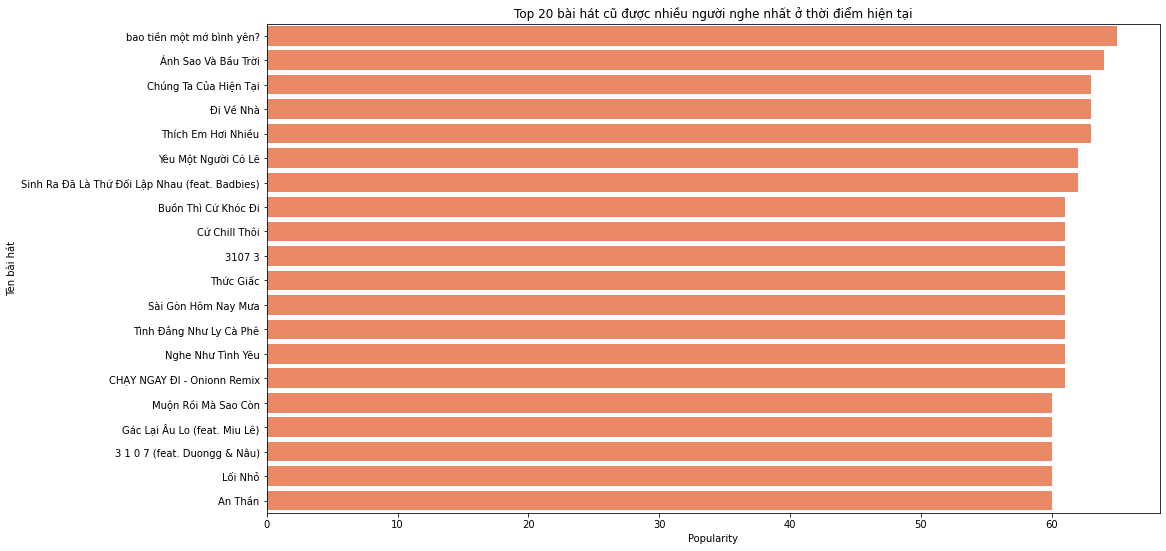

In [9]:
fig,ax = plt.subplots(figsize = (16,9))
sns.barplot(data = sorted_df.head(20), x = 'popularity', y = 'name', ax = ax, color = 'coral')
ax.set_xlabel('Popularity')
ax.set_ylabel('Tên bài hát')
ax.set_title('Top 20 bài hát cũ được nhiều người nghe nhất ở thời điểm hiện tại')

## Câu hỏi 2: Với từng khoảng độ dài bài hát, điểm popularity trung bình của các bài hát là bao nhiêu ?

**Ý nghĩa câu hỏi**: Trả lời được câu hỏi này có thể giúp ta biết được đâu là khoảng độ dài lý tưởng nhất cho một bài hát có thể dễ dàng trở nên nổi tiếng. Dựa vào đó, các nghệ sĩ có thể sáng tác ra các bài hát với độ dài phù hợp với nhu cầu của người nghe.

### Các bước thực hiện

Ta sẽ chia độ dài một bài hát thành các khoảng, với mỗi khoảng tương ứng là 1 phút:
* 0-1 phút
* 1-2 phút
* 2-3 phút
* 3-4 phút
* ...

Vì độ dài bài hát trong tập dữ liệu đang lưu dưới đơn vị giây, mỗi khoảng sẽ tương ứng với 60 giây.

In [10]:
longest_duration = tracks_df['duration'].max()
bins = np.arange(0, longest_duration+1,60)
labels = ['{}-{}'.format(bins[i]//60,bins[i+1]//60) for i in range(len(bins)-1)]

In [11]:
cut = pd.cut(tracks_df['duration'], bins = bins, labels = labels)
popu_by_dur_df = tracks_df.groupby(cut)['popularity'].mean().to_frame(name = 'avg_popularity').reset_index()
popu_by_dur_df['avg_popularity'] = popu_by_dur_df['avg_popularity'].fillna(0).round(2)
popu_by_dur_df

,duration,avg_popularity
0,0-1,31.89
1,1-2,31.22
2,2-3,35.43
3,3-4,35.35
4,4-5,34.19
5,5-6,30.61
6,6-7,11.38
7,7-8,17.50
8,8-9,12.89
9,9-10,26.25


Text(0, 0.5, 'độ nổi tiếng trung bình')

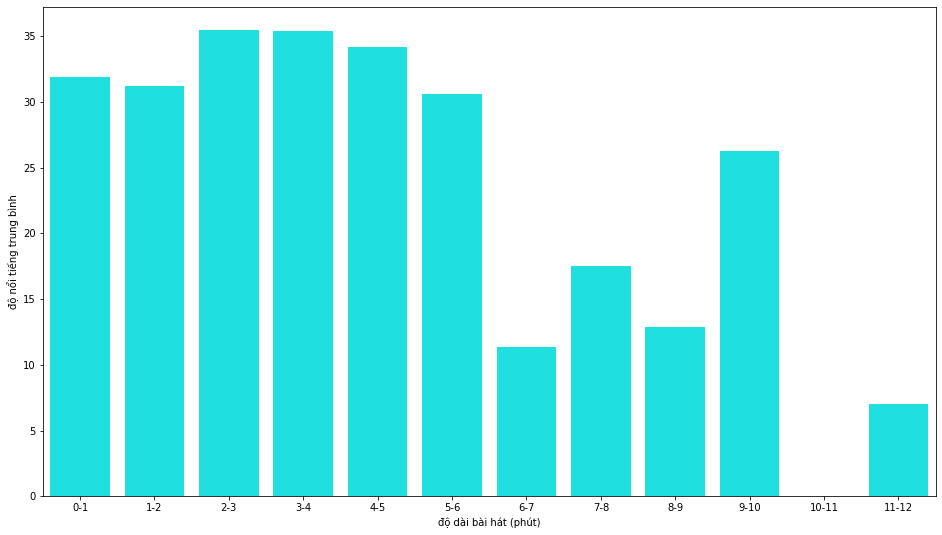

In [12]:
fig,ax = plt.subplots(figsize = (16,9))
sns.barplot(data = popu_by_dur_df, x = 'duration', y = 'avg_popularity', ax = ax, color = 'cyan')
ax.set_xlabel('độ dài bài hát (phút)')
ax.set_ylabel('độ nổi tiếng trung bình')

Nhận xét: Những bài hát có độ dài ở khoảng 2-3 phút và 3-4 phút có điểm popularity trung bình gần như ngang nhau, theo sau là những bài hát có độ dài ở khoảng 4-5 phút. Ta có thể phần nào kết luận rằng, độ dài lý tưởng cho một bài hát là vào khoảng từ 2-5 phút. Từ đó các nghệ sĩ có thể sáng tác bài hát có độ dài phù hợp với thị hiếu của người nghe.

## Câu 3: Thể loại nhạc nào chiếm phần lớn ở các nghệ sĩ có trên 100,000 followers trên Spotify ?

**Ý nghĩa câu hỏi:** Trả lời được câu hỏi trên sẽ giúp ta biết được thị hiếu của người nghe hiện tại đối với thị trường nhạc ở Việt Nam. Nghệ sĩ có nhiều followers do nhiều lý do và một trong số đó là thể loại nhạc nghệ sĩ tập trung được nhiều người chuộng. 

Lấy ra các artist có trên 100k followers, sau đó explode cột artist_genres thành các giá trị riêng lẽ.

In [13]:
filter_df = tracks_df.loc[tracks_df['artist_followers'] > 50000, ['artist','artist_followers','artist_genres']]
filter_df = filter_df.drop_duplicates('artist').explode('artist_genres').reset_index(drop = True)
filter_df.head(10)

,artist,artist_followers,artist_genres
0,Thùy Chi,477414,v-pop
1,Thùy Chi,477414,vietnamese singer-songwriter
2,Vũ.,1425153,indie viet
3,Vũ.,1425153,rock viet
4,Vũ.,1425153,v-pop
5,Vũ.,1425153,vietnamese singer-songwriter
6,Jack - J97,446371,v-pop
7,JustaTee,627661,v-pop
8,JustaTee,627661,vietnamese hip hop
9,JustaTee,627661,vietnamese melodic rap


In [14]:
n = len(filter_df['artist_genres'])
genres_count = filter_df['artist_genres'].value_counts()
genres_count_df = genres_count.to_frame(name = 'percentage')
genres_count_df

,percentage
v-pop,68
vietnamese hip hop,22
vietnamese melodic rap,13
indie viet,11
vietnamese singer-songwriter,6
vietnamese trap,4
rock viet,3
viet lo-fi,3
viet remix,2
vietnamese pop,1


Trực quan dữ liệu bằng biểu đồ tròn

Text(0.5, 1.0, 'Phần trăm thể loại nhạc của các artist có trên 100k followers')

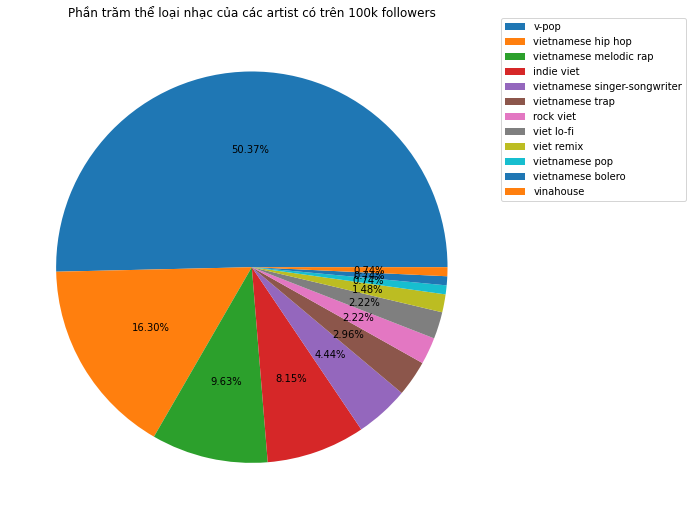

In [15]:
ax = genres_count_df.plot.pie(y = 'percentage', figsize = (20,9), autopct='%.2f%%', ylabel = '', labeldistance = None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.set_title('Phần trăm thể loại nhạc của các artist có trên 100k followers')

## Câu 4: Số bài hát được upload lên Spotify qua từng năm dựa vào năm album được release ? 

**Ý nghĩa câu hỏi:** Trả lời được câu hỏi này giúp ta có thể đánh giá được tình hình phát triển của music streaming cũng như độ phổ biến của Spotify ở Việt Nam thay đổi đổi thế nào qua các năm.

Bởi vì Spotify được ra mắt công chúng vào năm 2010, ta sẽ chỉ lấy những bài hát được phát hành từ năm 2011 đổ về sau để đảm bảo bài hát có thể upload lên Spotify khi mới phát hành.

In [16]:
filter_date_df = tracks_df[tracks_df['release_date'].apply(lambda x : int(x.year) > 2010)]
filter_date_df

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,0eAWyR4wHynLdc9A0VTVQP,Lửng Lơ - Remix,IOF Viet Nam,100,[],Lửng Lơ (Remix),2022-07-07,1,258,False,25
1,5iN9Ok2bsAE2lCBVEx9L1U,Cheri Cheri Lady - Remix,IOF Viet Nam,100,[],Cheri Cheri Lady (Remix),2022-07-07,1,193,False,24
2,0NIjRHPH7vq56ZaEgfk1DD,Ngày Chưa Giông Bão - Remix,IOF Viet Nam,100,[],Ngày Chưa Giông Bão (Remix),2022-06-29,1,202,False,15
3,5yANdLi61sbT2gBK1jIGVV,Tay Trái Chỉ Trăng - Remix,IOF Viet Nam,100,[],Tay Trái Chỉ Trăng (Remix),2022-06-28,1,243,False,12
4,2OCkw2aRFHZJ3k9zy07g5x,Xa Vắng - Remix,IOF Viet Nam,100,[],Xa Vắng (Remix),2022-07-24,1,142,False,12
...,...,...,...,...,...,...,...,...,...,...,...
1510,33ISD5e3fEp72qV35w1wE8,Hang Nghin Kilomet,hooligan.,31146,[v-pop],Hang Nghin Kilomet,2020-06-04,1,223,False,34
1511,3RHjF3f04LeCgZwZJp50zI,Bai Hat Cho Darling,hooligan.,31146,[v-pop],Bai Hat Cho Darling,2020-12-17,1,202,False,22
1512,4YFEQfiGTDoyRNuJs2wrED,Love You Bae!,hooligan.,31146,[v-pop],Love You Bae!,2021-04-14,1,203,False,21
1513,5CFtSlO2CSCEEVRj8I1rtx,Future Of Us,hooligan.,31146,[v-pop],Bài Hát Hay Nhất - Big Song Big Deal (Tập 10),2022-12-04,5,193,False,17


Số lượng bài hát được upload qua từng năm

In [17]:
count_by_year_df = filter_date_df.groupby(filter_date_df['release_date'].dt.year)['id'].agg(['count'])
count_by_year_df

,count
release_date,
2011,9
2012,12
2013,5
2014,11
2015,31
2016,37
2017,63
2018,94
2019,109


Trực quan bằng biểu đồ đường

Text(0.5, 1.0, 'Số lượng bài hát được upload lên Spotify qua từng năm')

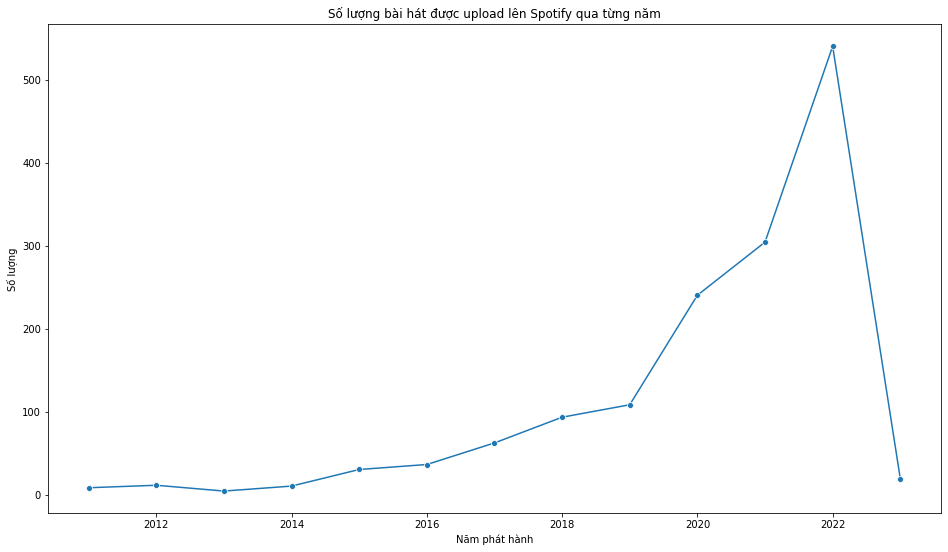

In [18]:
fig,ax = plt.subplots(figsize = (16,9))
sns.lineplot(data = count_by_year_df, x = count_by_year_df.index, y = 'count', ax = ax, marker = 'o')
ax.set_xlabel('Năm phát hành')
ax.set_ylabel('Số lượng')
ax.set_title('Số lượng bài hát được upload lên Spotify qua từng năm')

**Nhận xét:** Số lượng bài hát tăng dần nhưng không quá nhiều trong giai đoạn từ năm 2011 - 2019. Tuy nhiên, từ năm 2020 trở đi chứng kiến sự tăng trưởng mạnh về số lượng bài hát được phát hành trong năm. Qua đó, ta có thể cho rằng music streaming nói chung và Spotify nói riêng đang trở nên phổ biến hơn và ngày càng được nhiều người ở Việt Nam biết đến.